In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report
#plt.style.use('fivethertyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install imblearn

ERROR: Could not find a version that satisfies the requirement imblearn (from versions: none)
ERROR: No matching distribution found for imblearn
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install imblearn
!pip install imbalanced-learn

ERROR: Could not find a version that satisfies the requirement imblearn (from versions: none)
ERROR: No matching distribution found for imblearn


In [4]:
df=pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

# **Explore Data**

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

0

# **Analysis**

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

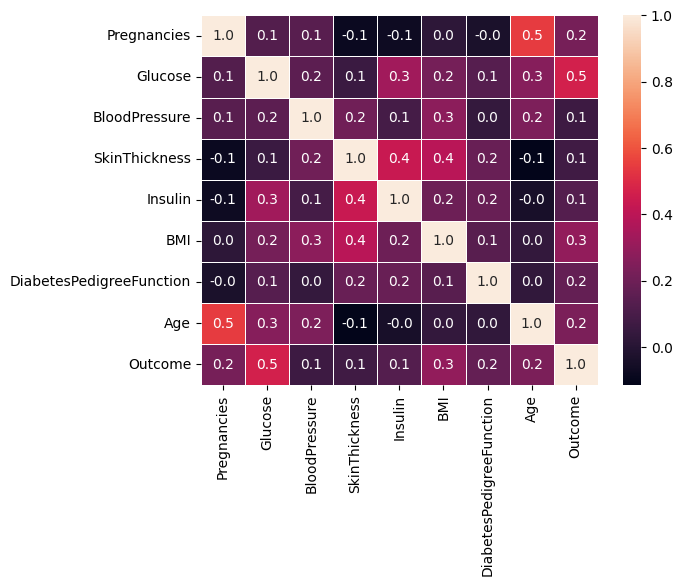

In [10]:
sns.heatmap(df.corr(),annot=True,fmt='0.1f',linewidth=.5)

<Axes: xlabel='Outcome', ylabel='count'>

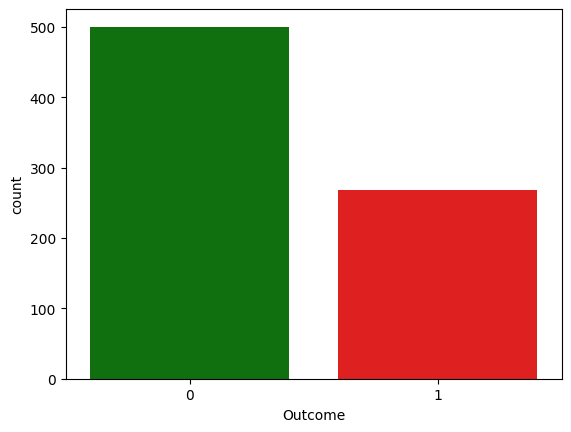

In [11]:
sns.countplot(x='Outcome',data=df,palette=['g','r'])

In [12]:
maxi=df[df['Outcome']==0]
mini=df[df['Outcome']==1]
maxi.shape , mini.shape

((500, 9), (268, 9))

In [13]:
268/(268+500) # data is not balance

0.3489583333333333

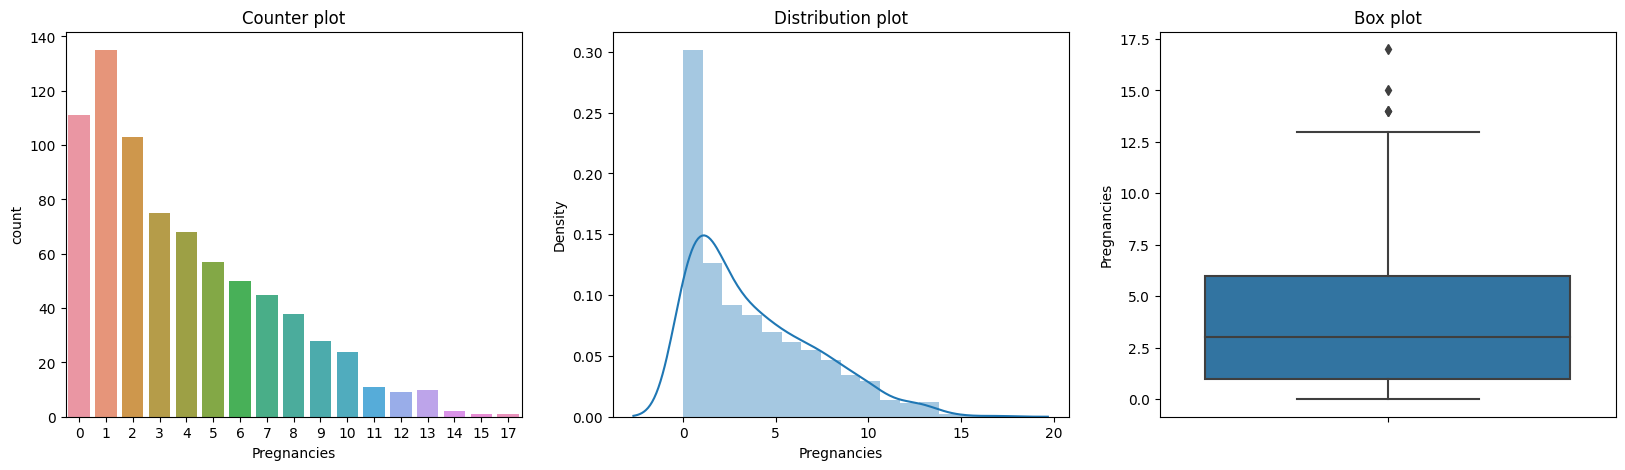

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('Counter plot')
sns.countplot(x = 'Pregnancies',data=df)

plt.subplot(1,3,2)
plt.title('Distribution plot')
sns.distplot(df["Pregnancies"])

plt.subplot(1,3,3)
plt.title('Box plot')
sns.boxplot(y=df["Pregnancies"])

plt.show()

<Axes: title={'center': 'Age'}>

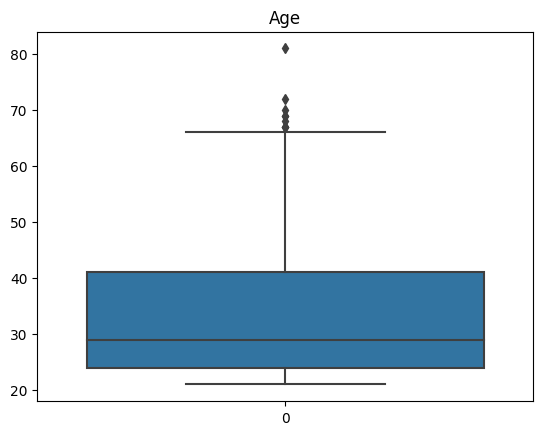

In [15]:
plt.title('Age')
sns.boxplot(df.Age)

# **Create Model**

In [16]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [17]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [18]:
rms=RandomOverSampler(random_state=41)
x_res,y_res=rms.fit_resample(x,y)


In [19]:
from collections import Counter

In [20]:
print('old data set shap{}'.format(Counter(y)))
print('old data set shap{}'.format(Counter(y_res)))

old data set shapCounter({0: 500, 1: 268})
old data set shapCounter({1: 500, 0: 500})


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)


In [22]:
lo=LogisticRegression()
s=SVC()
rm=RandomForestClassifier(class_weight='balanced',n_estimators=100)
gb=GradientBoostingClassifier(n_estimators=1000)


In [23]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
r1=[]
r2=[]
r3=[]

In [24]:
def cal(model):
    print(model)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    acc=accuracy_score(pre,y_test)
    rs=recall_score(pre,y_test)
    f=f1_score(pre,y_test)
    r1.append(acc)
    r2.append(rs)
    r3.append(f)
    cm=confusion_matrix(pre,y_test)
    print('Accuracy_score is : ',acc,'\nRecall_score is :',rs,'\nf1_score is ',f,'\nConfusion_matrix is : ',cm)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    


LogisticRegression()
Accuracy_score is :  0.7597402597402597 
Recall_score is : 0.7551020408163265 
f1_score is  0.6666666666666666 
Confusion_matrix is :  [[80 25]
 [12 37]]


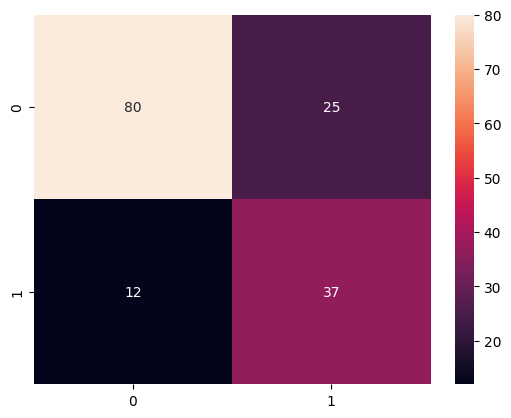

In [25]:
cal(lo)

SVC()
Accuracy_score is :  0.6753246753246753 
Recall_score is : 0.6363636363636364 
f1_score is  0.5283018867924528 
Confusion_matrix is :  [[76 34]
 [16 28]]


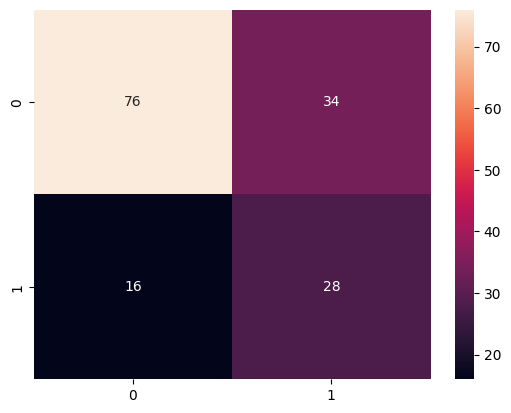

In [26]:
cal(s)

RandomForestClassifier(class_weight='balanced')
Accuracy_score is :  0.7532467532467533 
Recall_score is : 0.7222222222222222 
f1_score is  0.6724137931034483 
Confusion_matrix is :  [[77 23]
 [15 39]]


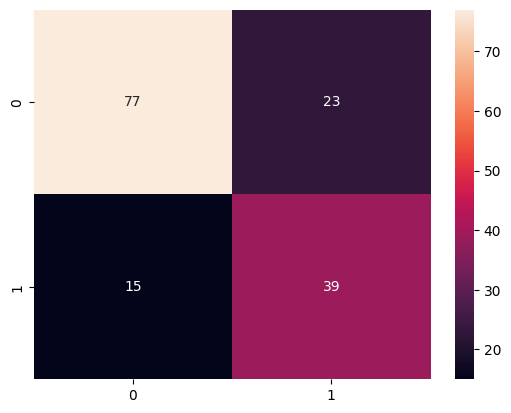

In [27]:
cal(rm)

GradientBoostingClassifier(n_estimators=1000)
Accuracy_score is :  0.7077922077922078 
Recall_score is : 0.6545454545454545 
f1_score is  0.6153846153846153 
Confusion_matrix is :  [[73 26]
 [19 36]]


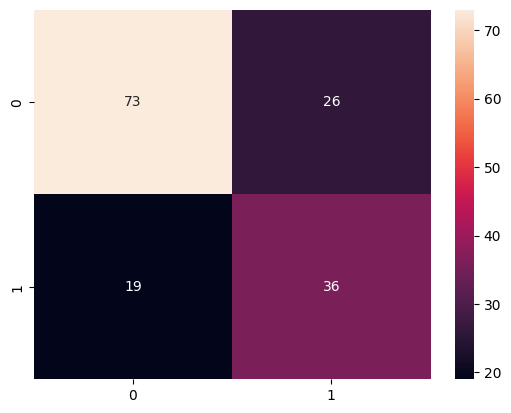

In [28]:
cal(gb)

In [29]:
r1

[0.7597402597402597,
 0.6753246753246753,
 0.7532467532467533,
 0.7077922077922078]

In [30]:
r2

[0.7551020408163265,
 0.6363636363636364,
 0.7222222222222222,
 0.6545454545454545]

In [31]:
r3

[0.6666666666666666,
 0.5283018867924528,
 0.6724137931034483,
 0.6153846153846153]

In [32]:
res=pd.DataFrame({'Algrithm':columns,'Accuracies':r1,'Recall':r2,'FScore':r3})

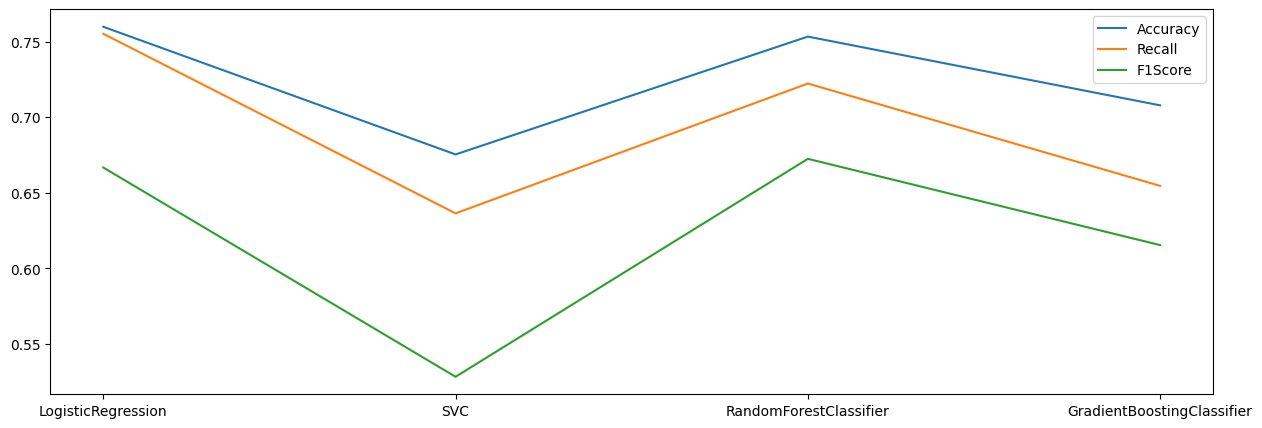

In [33]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(res.Algrithm,r1, label='Accuracy')
plt.plot(res.Algrithm,r2, label='Recall')
plt.plot(res.Algrithm,r3, label='F1Score')
plt.legend()
plt.show()